# [NTDS'18] Final project
[ntds'18]: https://github.com/mdeff/ntds_2018

* Team: `4` ([github repo](https://github.com/swouf/ntds_IMDb_team4))
* Dataset: `IMDb Films and Crew`

### Authors :
+ [Julien Berger](mailto:juliengaetan.berger@epfl.ch)
+ [Jérémy Jayet](mailto:jeremy.jayet@epfl.ch)
+ [Hana Samet](mailto:hana.samet@epfl.ch)
+ [Mathieu Shiva](mailto:mathieu.shiva@epfl.ch)

## 0 - Import packages and data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import sparse
import scipy.sparse.linalg
from matplotlib import pyplot as plt
from pyunlocbox import functions, solvers
import pygsp as pg
import networkx as nx
import logging
import json
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

import src.load_data as ldata

In [2]:
(movies,people) = ldata.load_dataframes();

2018-12-26 16:08:54,198 | INFO : Data loaded !


In [3]:
(adjacency, movies_by_budget) = ldata.make_budget_based_adjacency(movies);

G = pg.graphs.Graph(adjacency)

2018-12-26 16:08:54,257 | INFO : The budget max = 380000000
2018-12-26 16:08:54,260 | INFO : 0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64
2018-12-26 16:09:47,003 | INFO : Adjacency done !


In [7]:
vote_avrg = movies_by_budget['vote_average'].copy()
G.compute_fourier_basis()
vote_avrg_ft = G.gft(vote_avrg.values)

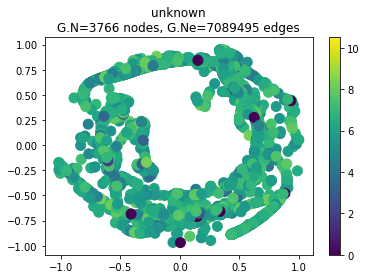

In [8]:
G.set_coordinates(kind='spring')



pg.plotting.plot_signal(G, vote_avrg.values,)

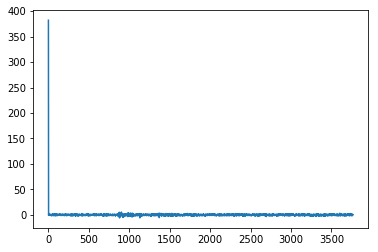

In [10]:
plt.plot(vote_avrg_ft)

Text(0.5, 1.05, 'adjacency matrix')

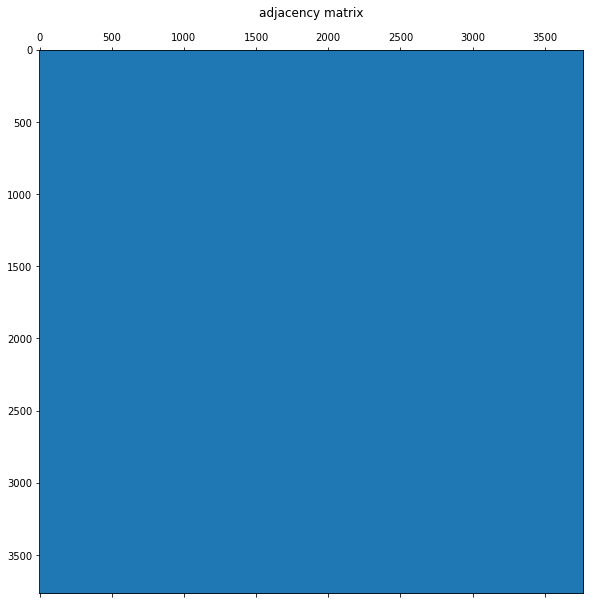

In [5]:
plt.figure(figsize=(10, 10))
plt.spy(adjacency, markersize=0.1)
plt.title('adjacency matrix')